<a href="https://colab.research.google.com/github/ag20327/CE888/blob/main/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#libraries
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import GridSearchCV

In [3]:
#load data
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
print("The dataset has %d columns and %d rows" % (df.shape[1], df.shape[0]))
#df.columns
df[features].head()

The dataset has 21 columns and 41188 rows


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [81]:
#Dropping nans
print("Instances before dropping Nans: ", len(df))
df=df.dropna()
print("Instances after dropping Nans: ", len(df))
print("The dataset has %d columns and %d rows" % (df.shape[1], df.shape[0]))

Instances before dropping Nans:  41188
Instances after dropping Nans:  41188
The dataset has 21 columns and 41188 rows


In [5]:
outcomes_of_interest=  ['y']


X_df = df[features].copy()
y_df = df[outcomes_of_interest].copy()
y_df[outcomes_of_interest] = y_df[outcomes_of_interest].apply(LabelEncoder().fit_transform)
print(y_df.head())

   y
0  0
1  0
2  0
3  0
4  0


In [74]:
#One Hot encoding with dummies for X(features)
df_dummies = pd.get_dummies(X_df)
df_dummies=df_dummies.drop(columns="duration")
print("The dataset has %d columns and %d rows" % (df_dummies.shape[1], df_dummies.shape[0]))
df_dummies.head()


The dataset has 62 columns and 41188 rows


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [7]:
X = df_dummies.values
y = y_df.values.T[0]

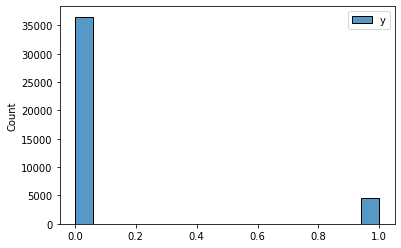

In [8]:
#Plot histogram
sns_plot = sns.histplot(y_df, kde=False)


Model Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=50)


In [10]:
print(X_train)

[[ 32.   2. 999. ...   0.   1.   0.]
 [ 31.   1. 999. ...   0.   1.   0.]
 [ 28.   2. 999. ...   0.   1.   0.]
 ...
 [ 39.   1. 999. ...   0.   1.   0.]
 [ 60.   1. 999. ...   0.   1.   0.]
 [ 53.   2. 999. ...   0.   1.   0.]]


In [11]:
print(X_test)

[[ 40.   2. 999. ...   0.   1.   0.]
 [ 42.   6. 999. ...   0.   1.   0.]
 [ 35.   1. 999. ...   0.   1.   0.]
 ...
 [ 31.   3. 999. ...   0.   1.   0.]
 [ 35.   1. 999. ...   0.   1.   0.]
 [ 31.   2. 999. ...   0.   1.   0.]]


In [12]:
print(y_train)

[1 0 0 ... 0 0 1]


In [13]:
print(y_test)

[0 0 0 ... 0 0 0]


In [16]:
#Random Forest Classifer on training data on 100 trees
clf = RandomForestClassifier(n_estimators=100,max_depth=3)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1))  # cross-validation
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

F1: 0.26 +/- 0.02


In [83]:
#Random Forest Classifer on training data on 100 trees
clf = RandomForestClassifier(n_estimators=400,max_depth=6)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1))  # cross-validation
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

F1: 0.29 +/- 0.02


In [15]:
#Dummy Classifier
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
print("Dummy F1: %.2f" % f1(y, dummy_clf.predict(df_dummies)))

Dummy F1: 0.12


In [41]:
#Grid Search
clf_grid = RandomForestClassifier()
parameters = [{'n_estimators': [10,100,1000,10000], 'max_depth': [3,4,5]}]
grid_search = GridSearchCV(estimator= clf_grid,param_grid = parameters, scoring = 'f1',cv = 10)
grid_search = grid_search.fit(X_train, y_train)

In [55]:
f1_score = grid_search.best_score_

print("The best f1 for predicting test data for our model is : {0}% ".format(f1_score))

The best f1 for predicting test data for our model is : 0.28579295440480146% 


In [43]:
best_params= grid_search.best_params_
print("The best parameters for our model are :  ", (best_params))

The best parameters for our model are :   {'max_depth': 5, 'n_estimators': 100}


In [52]:
best_est= grid_search.best_estimator_
print("The best estimators for our model is:  ", (best_est))


The best estimators for our model is:   RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [54]:
print("The best index is: ",grid_search.best_index_)

The best index is:  9


In [45]:
#Random Forest Classifer on training data on 100 trees
clf = RandomForestClassifier(n_estimators=100,max_depth=5)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1))  # cross-validation
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

F1: 0.28 +/- 0.02


Importance of features


In [67]:
print(X.shape[1])

62


[ 7  8  2  4 61  6  5  0 49 60  3 42 52 50 59 43 44 53  1 17 34 48 55 14
 23 10 45 33 27 51 47 31 46 57 56 22 39 21 54 58 32 20 15  9 41 18 38 28
 36 30 25 26 11 37 13 16 12 19 40 24 29 35]
Feature ranking:
1. euribor3m (0.198236)
2. nr.employed (0.173378)
3. pdays (0.131721)
4. emp.var.rate (0.083708)
5. poutcome_success (0.083009)
6. cons.conf.idx (0.075147)
7. cons.price.idx (0.057939)
8. age (0.026122)
9. month_mar (0.021093)
10. poutcome_nonexistent (0.020244)
11. previous (0.015629)
12. contact_cellular (0.014129)
13. month_oct (0.013773)
14. month_may (0.012110)
15. poutcome_failure (0.010968)
16. contact_telephone (0.010358)
17. month_apr (0.006958)
18. month_sep (0.005006)
19. campaign (0.003350)
20. job_student (0.003264)
21. default_unknown (0.003210)
22. month_jun (0.002909)
23. day_of_week_mon (0.002506)
24. job_retired (0.002383)
25. marital_single (0.001612)
26. job_blue-collar (0.001531)
27. month_aug (0.001364)
28. default_no (0.001257)
29. education_basic.9y (0.001237

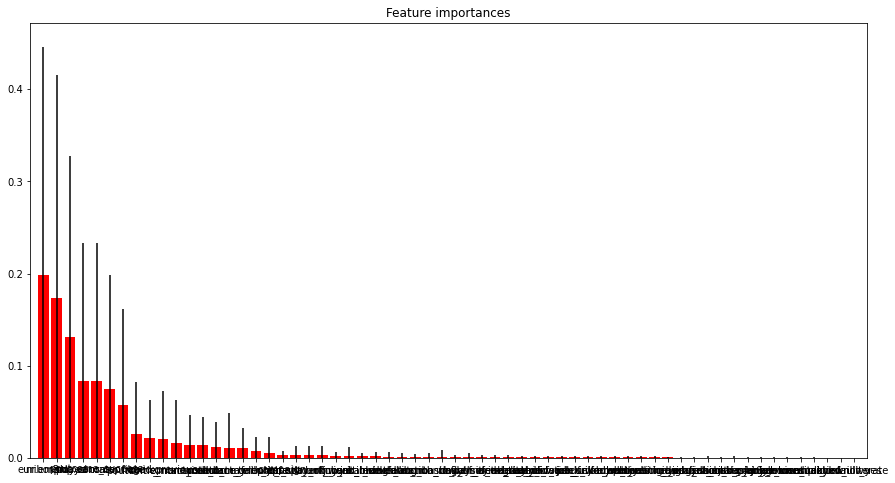

In [61]:
#Todas las featues
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, df_dummies.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(df_dummies.columns)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)


# plt.savefig("importances.pdf", bbox_inches='tight')

[ 7  8  2  4 61  6  5  0 49 60]
Feature ranking:
1. euribor3m (0.198236)
2. nr.employed (0.173378)
3. pdays (0.131721)
4. emp.var.rate (0.083708)
5. poutcome_success (0.083009)
6. cons.conf.idx (0.075147)
7. cons.price.idx (0.057939)
8. age (0.026122)
9. month_mar (0.021093)
10. poutcome_nonexistent (0.020244)


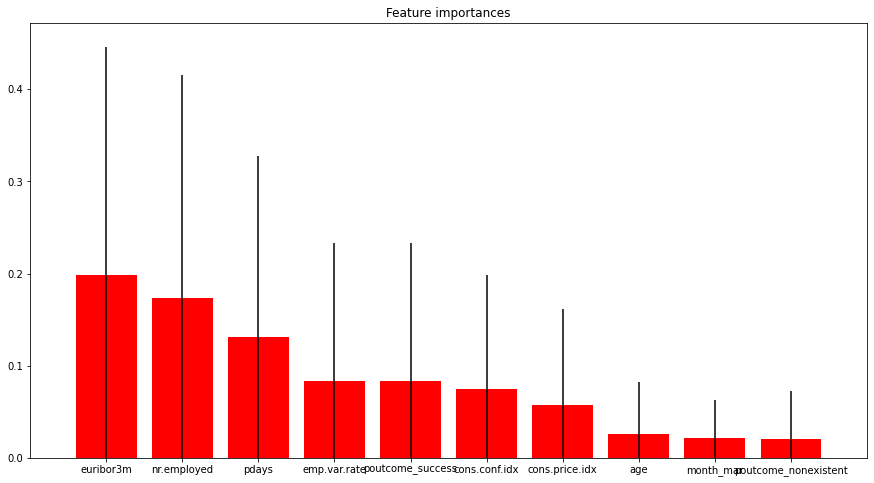

In [73]:
#10 featues
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices=indices[:10]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. %s (%f)" % (f + 1, df_dummies.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks((range(10)), np.array(df_dummies.columns)[indices])
plt.xlim([-1, 10])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')

In [56]:
#Generalization error with clf
clf.fit(X_train,y_train)
print("Generalization error f1 = %.2f" % f1(y_test, clf.predict(X_test)))

Generalization error f1 = 0.28


In [57]:
#Generalization error with clf gird
clf_grid.fit(X_train,y_train)
print("Generalization error f1 = %.2f" % f1(y_test, clf_grid.predict(X_test)))

Generalization error f1 = 0.37


In [60]:
#Generalization error with clf gird

print("Generalization error f1 = %.2f" % f1(y_test, grid_search.predict(X_test)))

Generalization error f1 = 0.28


Training

In [ ]:
clf = ExtraTreesClassifier(n_estimators=1000, max_depth=4)
scores = cross_val_score(clf, X, y, cv=10, scoring=make_scorer(f1))  # cross-validation
print("f1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.81 +/- 0.15


In [ ]:
clf = ExtraTreesClassifier(n_estimators=20000, max_depth=4)
clf.fit(X, y)
print("ExtraTrees f1 = %.2f" % f1(y, clf.predict(X)))

ExtraTrees ACC = 0.90


In [87]:
#Random Forest Classifer on training data on 100 trees
clf_test = RandomForestClassifier(n_estimators=1000,max_depth=8,random_state=60)
clf_test.fit(X_train, y_train)
print("The generalization error is with f1 = %.2f" % f1(y_test, clf_test.predict(X_test)))

importances = clf_test.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_test.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices=indices[:10]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. %s (%f)" % (f + 1, df_dummies.columns[indices[f]],  importances[indices[f]]))

The generalization error is with f1 = 0.31
[ 8  7  2 61  4  6  5  0  3 60]
Feature ranking:
1. nr.employed (0.167442)
2. euribor3m (0.155917)
3. pdays (0.109671)
4. poutcome_success (0.088978)
5. emp.var.rate (0.074312)
6. cons.conf.idx (0.073440)
7. cons.price.idx (0.053797)
8. age (0.030864)
9. previous (0.025305)
10. poutcome_nonexistent (0.018441)
